# Workshop 4 : Model Training and Evaluation
Before going through model training you need to conduct data preparation, and feature engineering to increase the chances to get good performance.


In [1]:
import verticapy as vp
# Connect with the database
vp.connect("tutorial_connection")
# Create VerticaPy schema for native verticapy models
vp.create_verticapy_schema()


## AutoML
VerticaPy provides [`AutoML`](https://www.vertica.com/python/documentation_last/delphi/automl/) a powerful tool to have reasonable idea which model has more probability to be the good choice for your task.


<div class="alert alert-block alert-info">
    <b>Important:</b> <b>AutoML</b> conduct basic data preparation on the variables as encoding and it choose the type of machine learning suitable for the case, In addition it perform search grid on the hyper-parameters of the model to the choose the best combination</div>
    
Let's try this tool on titanic dataset.

Starting AutoML



  0%|          | 0/2 [00:00<?, ?it/s]


Testing Model - LogisticRegression



  0%|          | 0/4 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.039217693227108566; Train_score: 0.033640239591022164; Time: 36.83019971847534;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.9021267096201578;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.040583753445655305; Train_score: 0.036957880673927836; Time: 28.09167226155599;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'enet', 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.8879384994506836;
Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Test_score: 0.03921769322710

  0%|          | 0/3 [00:00<?, ?it/s]

Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.0706856415320153; Train_score: 0.06664943236240303; Time: 0.504072348276774;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.08436024140614903; Train_score: 0.06930213876664787; Time: 0.504197359085083;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.31746547175390233; Train_score: 0.13849722070415663; Time: 0.5254793167114258;
Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 0.01, 'nbtype': 'auto'}; Test_score: 0.0706856415320153; Train_score: 0.06664943236240303; Time: 0.504072348276774;
Final Model

LogisticRegression; Best_Parameters: {'solver': 'bfgs', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Best_Test_score: 0.039217693227108566; Train_score: 0.033640239591022164; Time: 36.83019971847534;


Starting Stepwise


  0%|          | 0/16 [00:00<?, ?it/s]

[Model 0] aic: -4784.370676557166; Variables: ['"age"', '"boat_8"', '"boat_5"', '"boat_3"', '"boat_14"', '"boat_10"', '"boat_C"', '"boat_4"', '"boat_15"', '"boat_13"', '"fare"', '"pclass"', '"boat_Others"', '"sex_male"', '"sex_female"', '"boat_NULL"']
[Model 1] aic: -4784.356664365212; (-) Variable: "age"
[Model 2] aic: -4786.4124690202425; (-) Variable: "boat_8"
[Model 3] aic: -4788.474467685527; (-) Variable: "boat_5"
[Model 4] aic: -4790.473818020451; (-) Variable: "boat_3"
[Model 5] aic: -4797.005781440231; (-) Variable: "boat_14"
[Model 6] aic: -4798.809002956914; (-) Variable: "boat_10"
[Model 7] aic: -4801.228069437835; (-) Variable: "boat_C"
[Model 8] aic: -4803.503414369809; (-) Variable: "boat_4"
[Model 9] aic: -4803.352282665415; (-) Variable: "boat_15"
[Model 10] aic: -4804.972590298727; (-) Variable: "boat_13"
[Model 11] aic: -4806.983428493669; (-) Variable: "sex_male"
Selected Model

[Model 11] aic: -4806.983428493669; Variables: ['"fare"', '"pclass"', '"boat_Others"', '

,model_type,,avg_score,avg_train_score,avg_time,score_std,score_train_std,
1,LogisticRegression,,0.039217693227108566,0.033640239591022164,36.83019971847534,0.017067190045940827,0.004730353411128123,""" readonly>"
2,LogisticRegression,,0.040583753445655305,0.036957880673927836,28.09167226155599,0.006542582225881316,0.0038612024433968333,""" readonly>"
3,NaiveBayes,,0.0706856415320153,0.06664943236240303,0.504072348276774,0.017434007028329847,0.005529606501194603,""" readonly>"
4,NaiveBayes,,0.08436024140614903,0.06930213876664787,0.504197359085083,0.011935393348846189,0.0023304299632573105,""" readonly>"
5,LogisticRegression,,0.301029995663981,0.301029995663981,0.9021267096201578,0.0,0.0,""" readonly>"
6,LogisticRegression,,0.301029995663981,0.301029995663981,0.8879384994506836,0.0,0.0,""" readonly>"
7,NaiveBayes,,0.31746547175390233,0.13849722070415663,0.5254793167114258,0.3770812683401789,0.06912921334427545,""" readonly>"

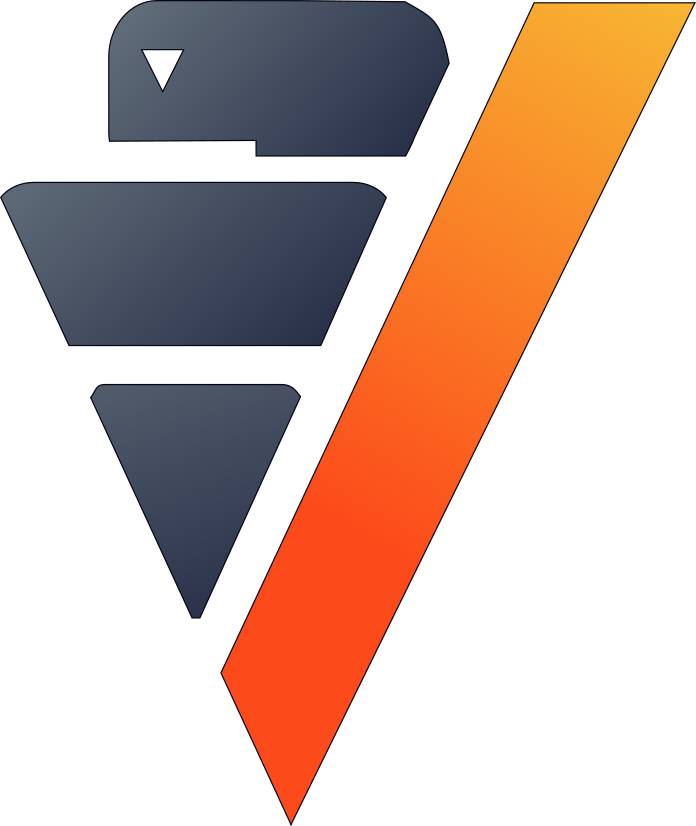

In [3]:
from verticapy.learn.delphi import AutoML

model = AutoML("titanic_autoML")
model.fit("public.titanic", 
          X = ["boat", "age", "fare", "pclass", "sex"],
          y = "survived")

<AxesSubplot:xlabel='n_features', ylabel='aic'>

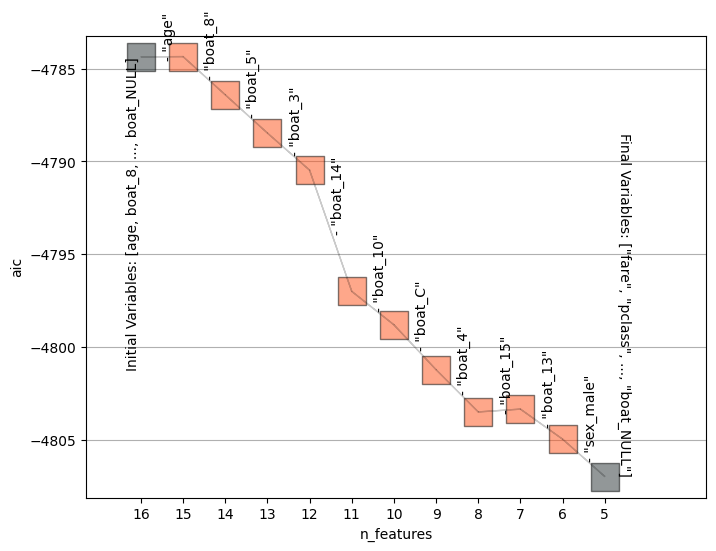

In [4]:
model.plot("stepwise")

<AxesSubplot:xlabel='time', ylabel='score'>

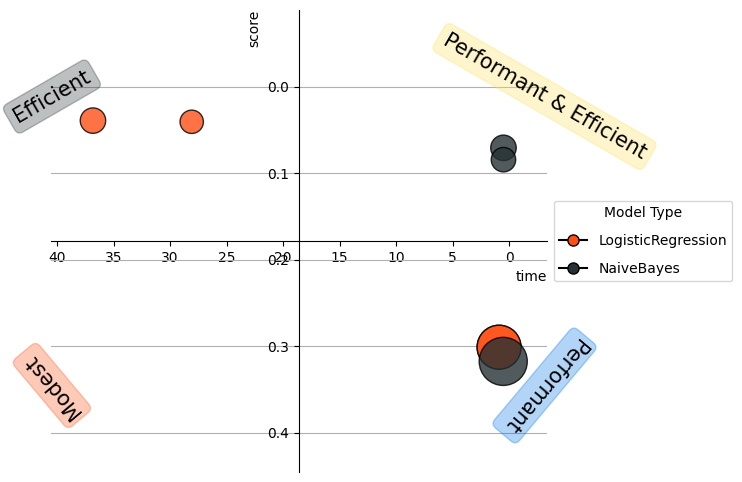

In [5]:
model.plot()

In general, conduction manual data preparation and features engineering leads to better results.
In this section we will not focus on data preparation because it's out of our scope (please refer to the previous workshops)

In [6]:
from verticapy.learn.linear_model import LogisticRegression
import verticapy as vp
import matplotlib.pyplot as plt
churn = vp.vDataFrame("public.churn")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0

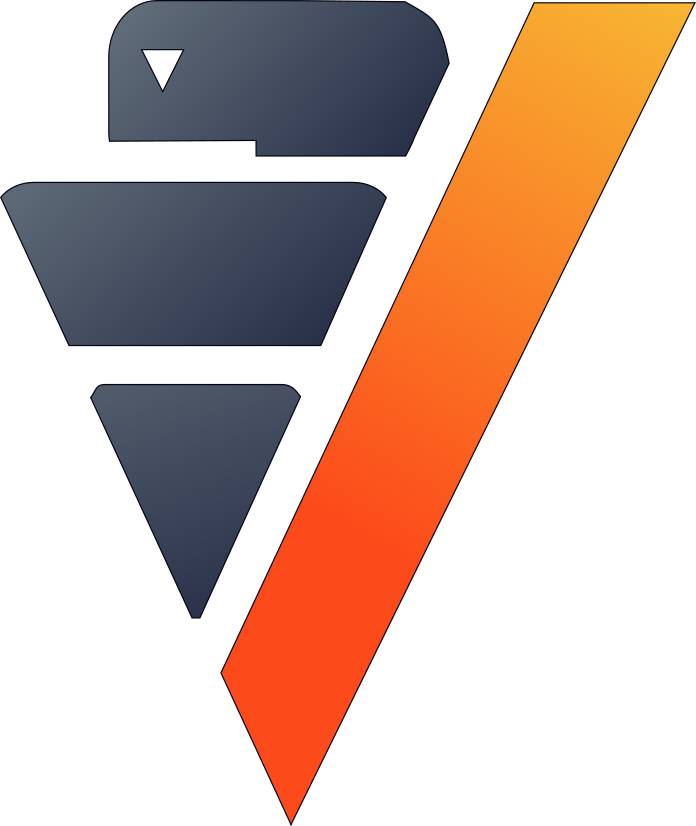

In [7]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID", 
                             "gender", 
                             "Contract", 
                             "PaymentMethod", 
                             "InternetService"])

In [8]:
# Split data to train and test data
train, test = churn.train_test_split(test_size = 0.2, 
                                     random_state = 0)

## Classification 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/classification.php)

,value
auc,0.8481161777549989
prc_auc,0.641461794537327
accuracy,0.8197303051809794
log_loss,0.171883215637707
precision,0.677115987460815
recall,0.5885558583106267
f1_score,0.629737609329446
mcc,0.5135645613036345
informedness,0.48970748978855383
markedness,0.5385838773690719

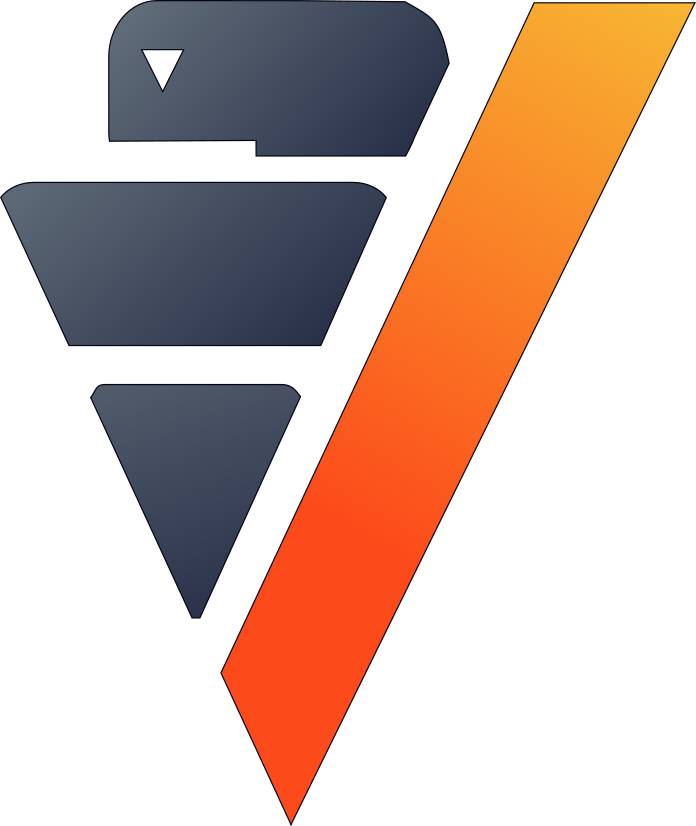

In [9]:
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(train, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn',
          test)
model.classification_report()

,importance,sign
,28.3,-1
,18.83,1
,9.2,1
,8.24,1
,6.01,-1
,4.74,1
,4.34,1
,3.07,-1
,2.85,-1
,2.56,1

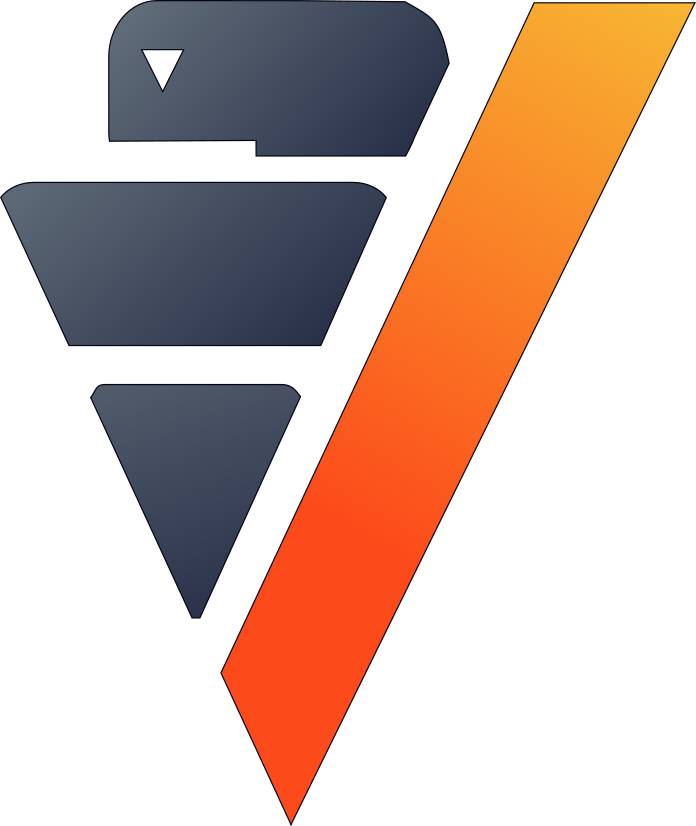

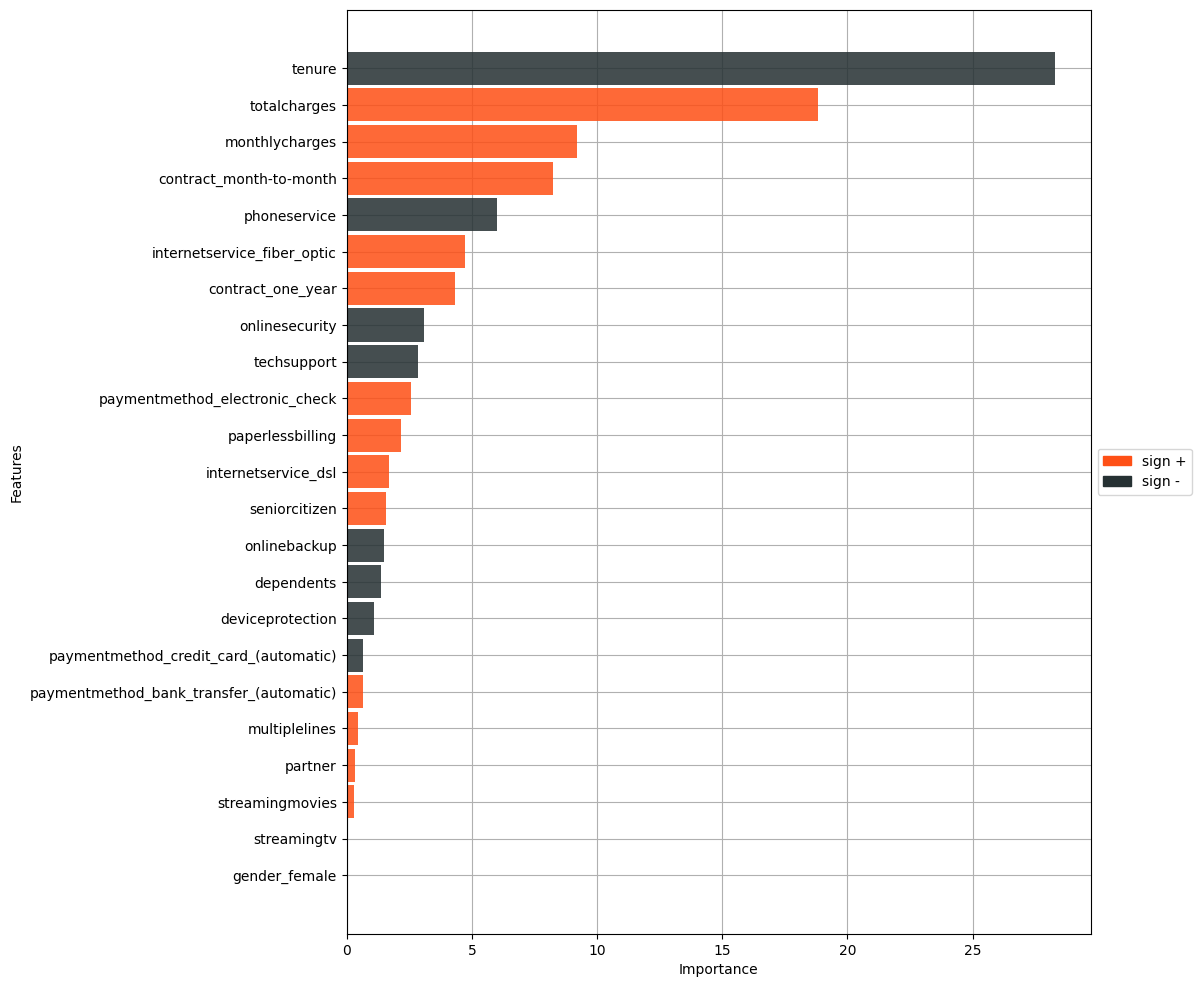

In [10]:
model.features_importance()

## Regression

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/regression.php)

In [11]:
from verticapy.learn.ensemble import RandomForestRegressor
model = RandomForestRegressor(name = "public.rf_churn",
                              n_estimators = 20,
                              max_features = "auto",
                              max_leaf_nodes = 32, 
                              sample = 0.7,
                              max_depth = 3,
                              min_samples_leaf = 5,
                              min_info_gain = 0.0,
                              nbins = 32)
model.fit(train,
churn.get_columns(exclude_columns = ["totalcharges"]), 
          'totalcharges',
          test)




call_string
SELECT rf_regressor('public.rf_churn', '"public"."_verticapy_tmp_view_dbadmin_647950_4744614390_"', 'totalcharges', '"SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check"' USING PARAMETERS exclude_columns='', ntree=20, mtry=8, sampling_size=0.7, max_depth=3, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
               predictor               |      type      
---------------------------------------+----------------
             seniorcitizen             |      int       
                partner                |      int       
            

,value
explained_variance,0.91042682717781
max_error,2423.41864383154
median_absolute_error,409.067500612355
mean_absolute_error,536.193701800348
mean_squared_error,476297.973782785
root_mean_squared_error,690.1434443525382
r2,0.910309131427971
r2_adj,0.9088153660571117
aic,18417.55706566397
bic,18542.634522409004

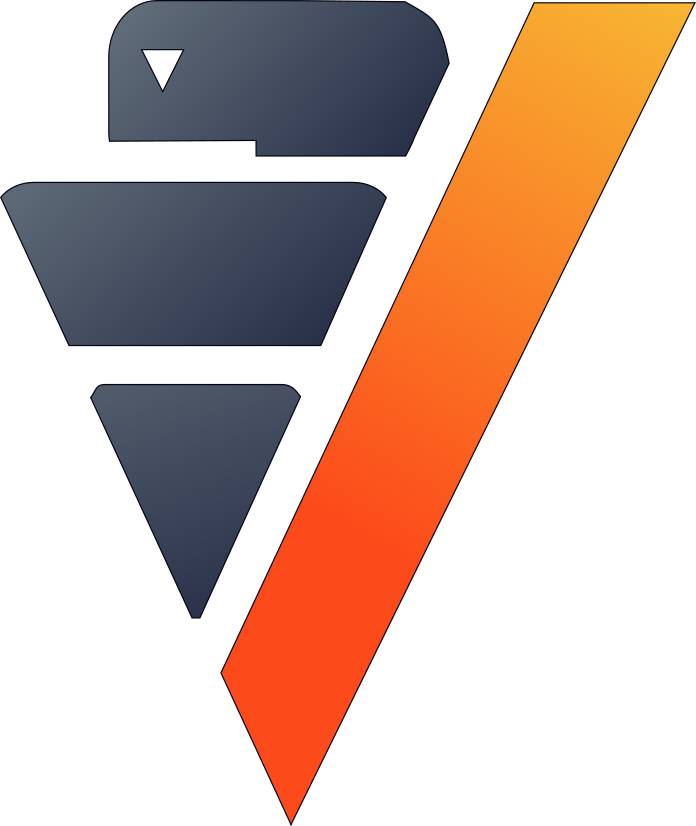

In [12]:
model.report()

## Clustering and Anomaly Detection 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/unsupervised.php)

In [13]:
from verticapy.learn.cluster import KMeans
model = KMeans(name = "public.kmeans_iris",
               n_cluster = 8,
               init = "kmeanspp",
               max_iter = 300,
               tol = 1e-4)
model.fit(churn,
          churn.get_columns(exclude_columns = ["churn"]))



centers
seniorcitizen|partner |dependents| tenure |phoneservice|multiplelines|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|paperlessbilling|monthlycharges|totalcharges|gender_female|internetservice_dsl|internetservice_fiber_optic|contract_month-to-month|contract_one_year|paymentmethod_bank_transfer_(automatic)|paymentmethod_credit_card_(automatic)|paymentmethod_electronic_check
-------------+--------+----------+--------+------------+-------------+--------------+------------+----------------+-----------+-----------+---------------+----------------+--------------+------------+-------------+-------------------+---------------------------+-----------------------+-----------------+---------------------------------------+-------------------------------------+------------------------------
   0.12847   | 0.46732|  0.35237 |29.26221|   0.90008  |   0.31630   |    0.16304   |   0.17956  |     0.18933    |  0.15853  |  0.22765  |    0.23366    |     0.51

In [14]:
# prediction
churn_clustered = model.predict(churn,
                               X=churn.get_columns(exclude_columns = ["churn"]),
                               name="cluster")

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123clusterInteger
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0,6
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0,6
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1,6
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1,0
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0,6
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0,6
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0,2
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,3
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1,6
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0,7

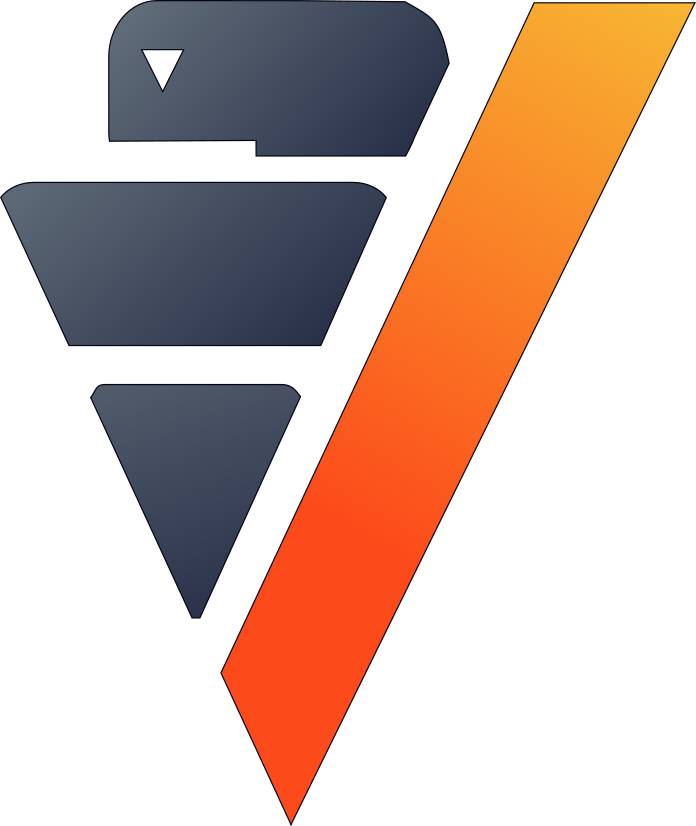

In [15]:
churn_clustered

For Isolation forest you can use `decision_function` to return the anomaly score (range from 0 to 1), then it gave you the flexibility to choose the threshold manually.

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123clusterInteger,123anomaly_scoreFloat(22)
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0,6,0.51977376919996
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0,6,0.494547154278005
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1,6,0.497433166823225
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1,0,0.510178028949136
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0,6,0.505942628069022
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0,6,0.523179089448073
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0,2,0.527490288970664
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,3,0.509239845306627
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1,6,0.508597696981692
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0,7,0.519437842417231

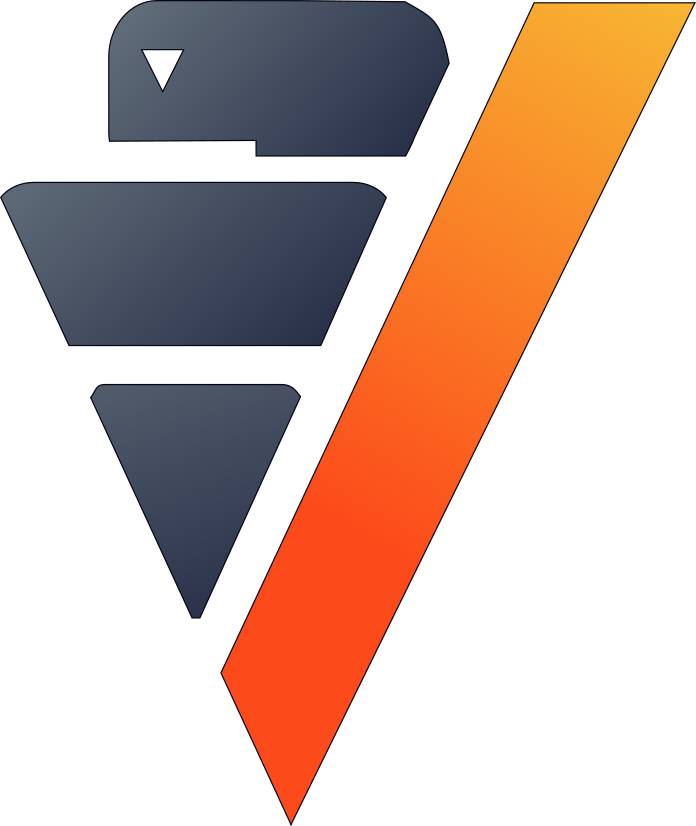

In [18]:
from verticapy.learn.ensemble import IsolationForest

# Initialization of isolation forest
iforest_model = IsolationForest(name = "public.iforest_model",
                               n_estimators = 20,
                               max_depth = 3,
                               nbins = 32)
# fit the model
iforest_model.fit(churn,
            churn.get_columns(exclude_columns = ["cluster"]))

# prediction
iforest_model.decision_function(churn, 
                        churn.get_columns(exclude_columns = ["cluster"]),
                        name = "anomaly_score")

## Time Series
Time series models are a type of regression on a dataset with a timestamp label.

,📅dateDate,123GoldFloat,123OilFloat,123SpreadFloat,123VixFloat,123Dol_EurFloat,123SP500Float
1,1986-01-01,345.561363636364,22.9254545454545,1.05142857142857,18.1213636363636,1.12159999999858,211.779999
2,1986-02-01,339.0525,15.4547368421053,0.736842105263158,20.6242105263158,1.07880000000296,226.919998
3,1986-03-01,346.094736842105,12.6125,0.564,23.564,1.04850000000442,238.899994
4,1986-04-01,340.715909090909,12.8436363636364,0.604090909090909,23.0154545454545,1.05259999999544,235.520004
5,1986-05-01,342.325,15.377619047619,0.642380952380952,18.8875,1.03720000000612,247.350006
6,1986-06-01,342.797619047619,13.4257142857143,0.614761904761905,18.5980952380952,1.0399999999936,250.839996
7,1986-07-01,348.554347826087,11.5845454545455,0.636818181818182,19.6390909090909,1.01029999999446,236.119995
8,1986-08-01,376.29,15.0966666666667,0.83952380952381,18.6380952380952,0.979300000000876,252.929993
9,1986-09-01,418.152272727273,14.8666666666667,1.10142857142857,22.7052380952381,0.973200000000361,231.320007
10,1986-10-01,423.863043478261,14.8968181818182,1.14727272727273,22.5239130434783,0.961600000000544,243.979996

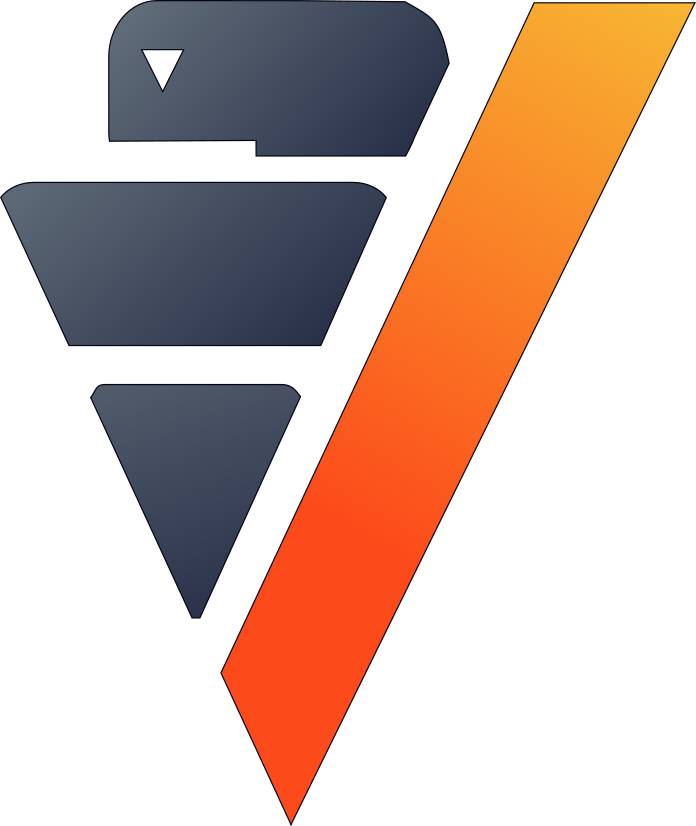

In [26]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

Let's create a [`VAR`](https://www.vertica.com/python/documentation_last/learn/VAR/) model to predict the change in our variables over time.

<div class="alert alert-block alert-warning">
    VAR model implementation uses pure SQL, so it is advicable to not use it on huge dataset, however, you can use <a href="https://www.vertica.com/python/documentation_last/learn/SARIMAX/index.php" title="read_csv">SARIMAX</a>
</div>

In [28]:
from verticapy.learn.tsa import VAR
var_model = VAR("VAR_commodities", p = 15)
var_model.drop()
var_model.fit(input_relation = "commodities",
          X = ["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"],
          ts = "date")

details

 # "Gold"

      predictor            coefficient               std_err                t_value                 p_value  
1     Intercept       28.5362468915191      23.4576167158535       1.21650239396372       0.224719007474869  
2         ar0_1       1.21249546311209    0.0583003268515877       20.7974042100773    9.38585656197178e-61  
3         ar0_2     -0.265717276383384    0.0911043814875882      -2.91662455794823     0.00379668763754037  
4         ar0_3      0.123604924076076    0.0924434825014417       1.33708640924631        0.18217474351721  
5         ar0_4    -0.0846535235905854    0.0922931959314058     -0.917223883475676        0.35973835612789  
6         ar0_5      0.147588310874085    0.0934758772779836       1.57889195770988        0.11538065396013  
7         ar0_6    -0.0746737711527223    0.0964409915451842     -0.774294933682183       0.439346523264487  
8         ar0_7     0.0300398502170651    0.0949450469490103      0.316391967589398       0.75191794

,"""Gold""","""Oil""","""Spread""","""Vix""","""Dol_Eur""","""SP500"""
explained_variance,-2.99075369649758,-2.95351617131735,-2.95000151118535,-2.42784247622005,-2.92957533669835,-2.98564084457666
max_error,3840.31462070037,266.088676452611,5.84729874087839,131.091119943061,2.27388220306767,6746.24885913539
median_absolute_error,802.159981554754,67.6175692024529,2.21128777148926,39.4665387048983,1.59450253575079,2173.50932929945
mean_absolute_error,1409.89329069005,90.2459279629996,2.38551707270557,43.1426003196181,1.61750898624812,2330.38823686522
mean_squared_error,2884679.9957216,11443.5735898725,8.55593673934625,2123.90553226451,2.65971307152233,7627018.16755038
root_mean_squared_error,1698.434572105031,106.97463993803625,2.925053288291728,46.08584958818173,1.630862677089132,2761.705662729173
r2,0.9969178988297,0.984505390437316,0.98333383705978,0.809280825408277,0.976525112259812,0.995213614862105
r2_adj,0.9960230952641291,0.9800069554029884,0.9784952736255225,0.7539107424622928,0.9697098222707251,0.9938240191769097
aic,6201.032439495149,3983.60632301484,1096.984486652658,3308.2534761855104,628.4532201651808,6590.917919047844
bic,6510.295227114675,4292.869110634366,1406.2472742721839,3617.516263805036,937.7160077847064,6900.18070666737

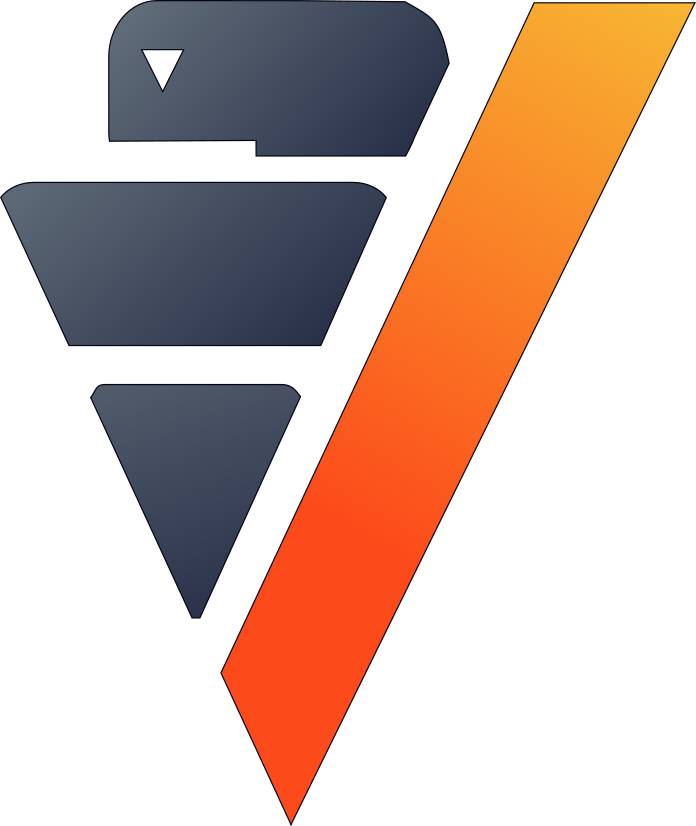

In [30]:
# model report 
var_model.report()

In [33]:
# prediction
prediction = var_model.predict(commodities,
                   nlead = 5)

Let's examine our prediction with a boxplot.

<AxesSubplot:>

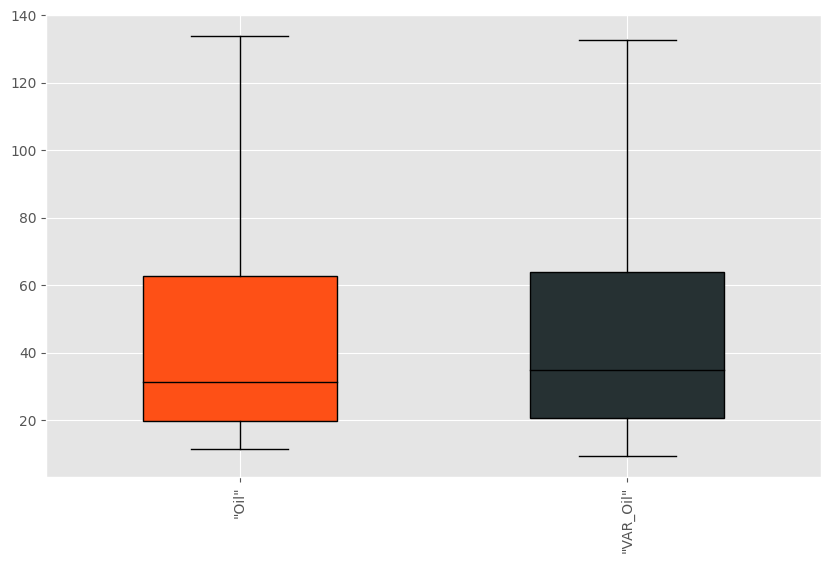

In [36]:
prediction.boxplot(["Oil", "VAR_Oil"])

Let's visualize our model with a graph.

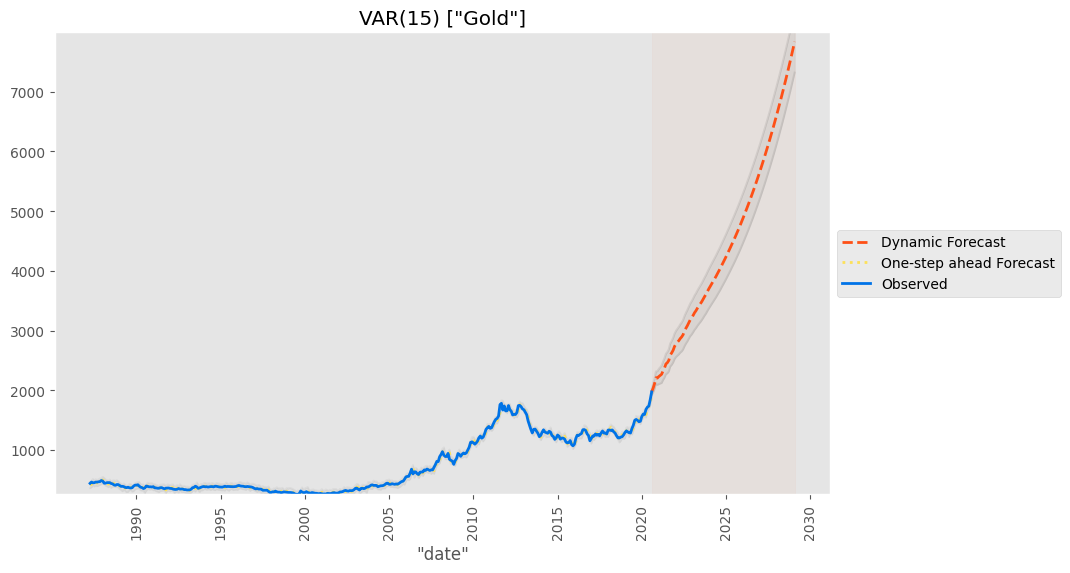

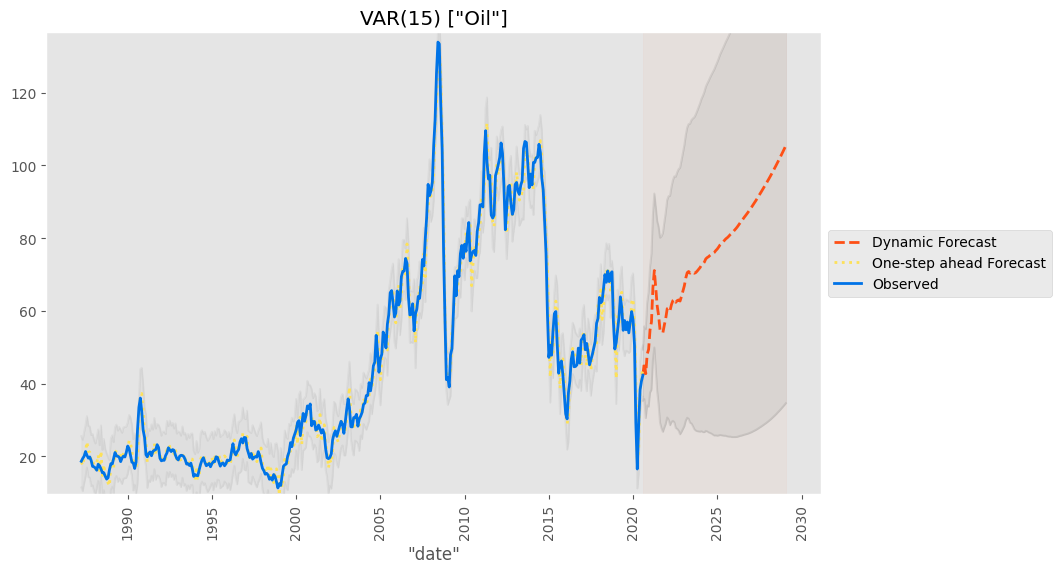

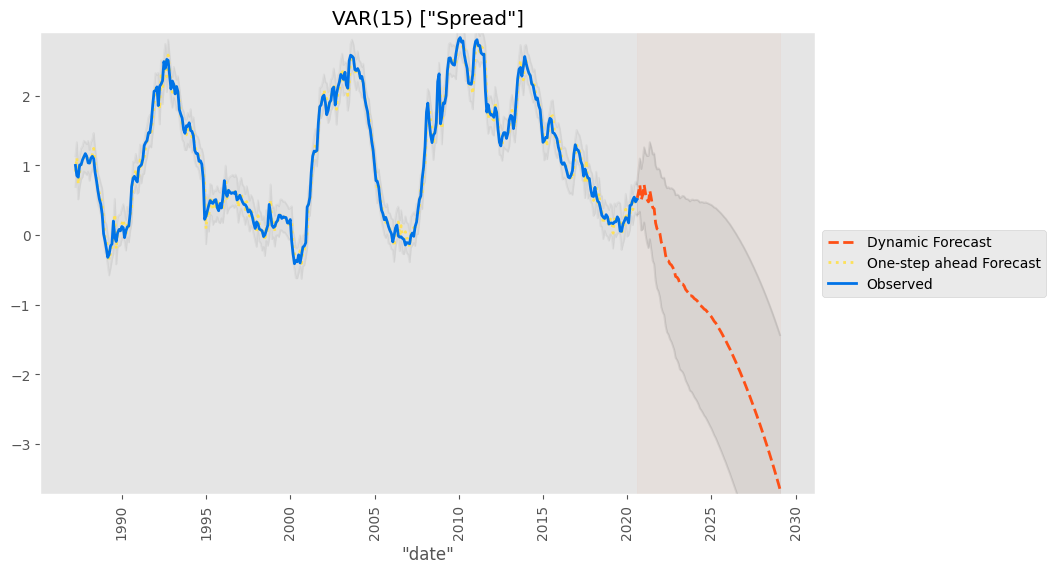

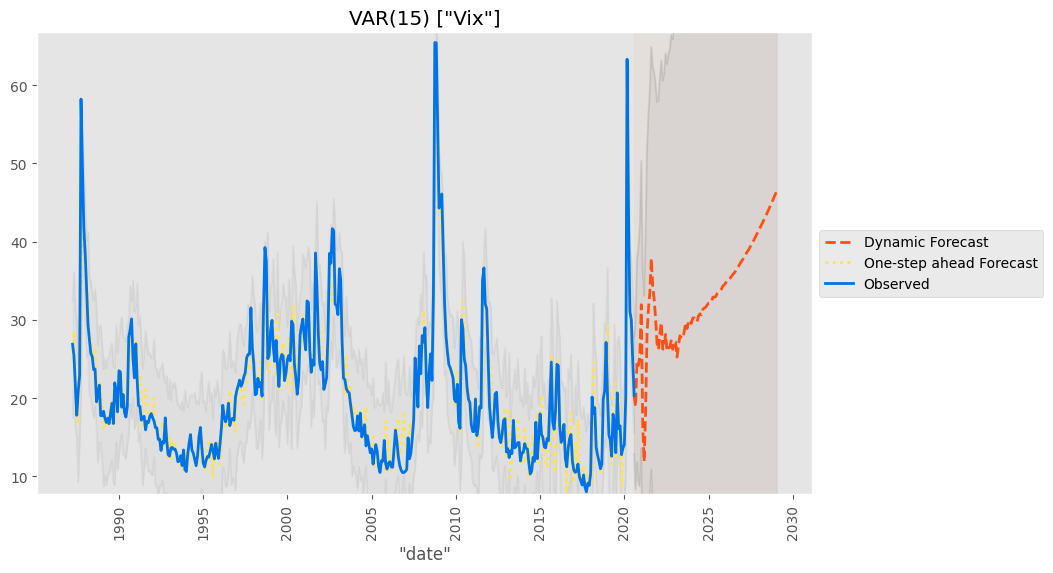

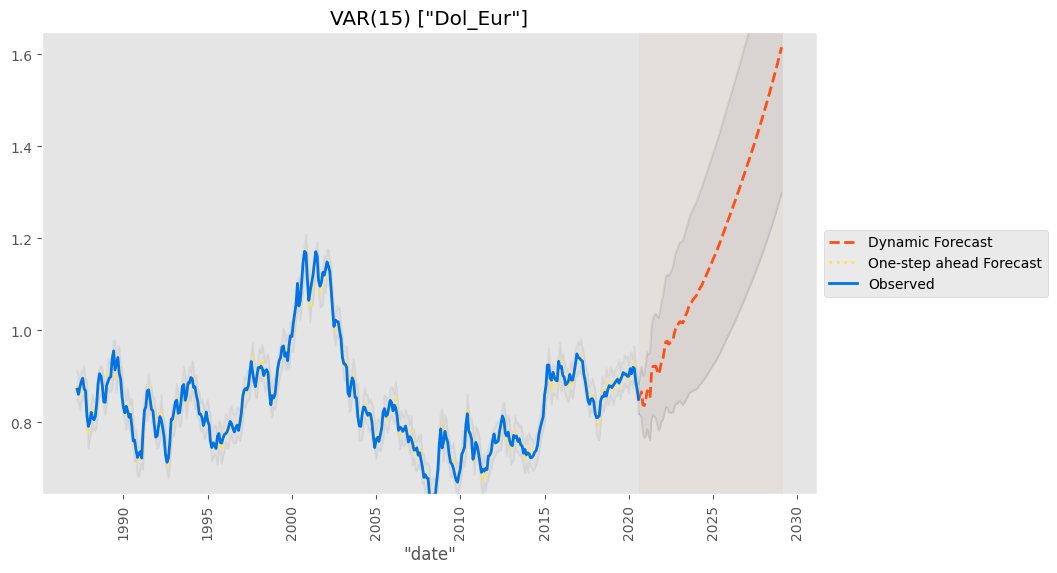

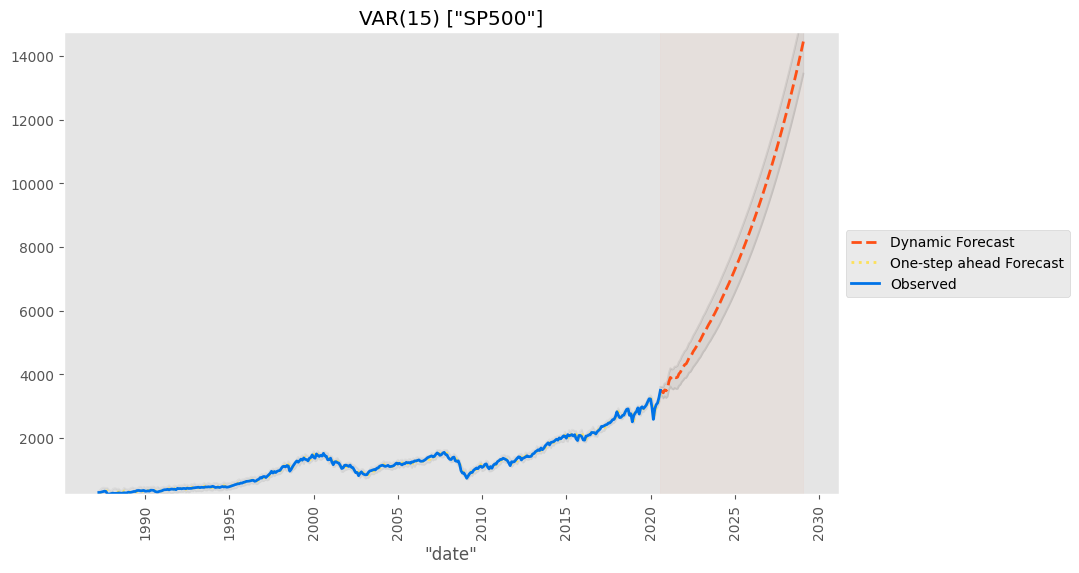

In [37]:
for elem in ['Gold', 
             'Oil', 
             'Spread', 
             'Vix', 
             'Dol_Eur', 
             'SP500']:
    var_model.plot(X_idx = elem,
               dynamic = True,
               nlead = 100)